In [9]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

/afs/inf.ed.ac.uk/user/s15/s1515679/.conda/envs/mlp/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


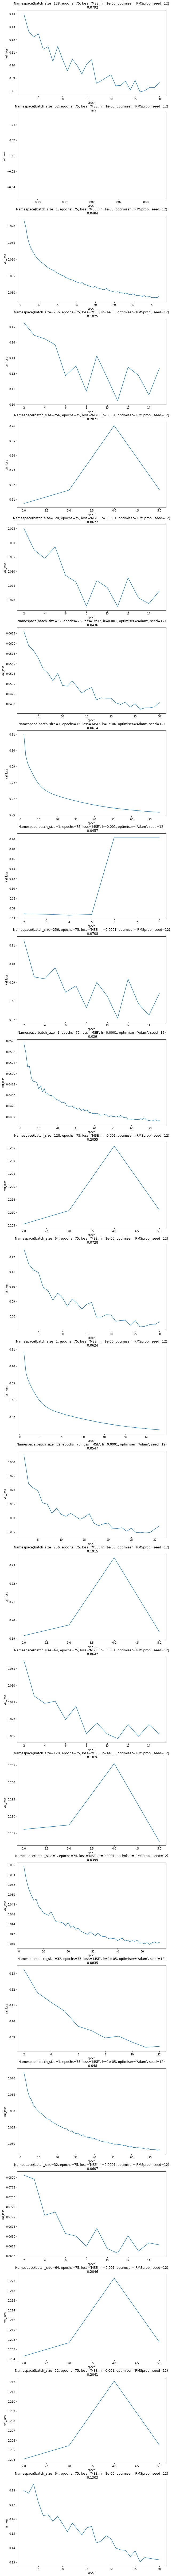

In [14]:
# data = pd.read_csv("FCNResults.csv") 
# data.head()
model_parameters = ""
index = 1
plt.figure(figsize=(10, 140))
plt.subplots_adjust(left=None, bottom=0.01, right=None, top=0.999, wspace=None, hspace=None)
plt.tight_layout()
topmodels = {}
for filename in os.listdir("experiment_results_autoencoders"):    
    plt.subplot(len(os.listdir("experiment_results_autoencoders")), 1, index)
    data = pd.read_csv("experiment_results_autoencoders/" + filename, skiprows=[0]) 
    with open("experiment_results_autoencoders/" + filename) as f:
        model_parameters = f.readline() 
    # print(model_parameters)    
    try:
        ax = sns.lineplot(x="epoch", y="val_loss", data=data)
    except ValueError:
        continue
    ax.set_title(model_parameters + "  " + str(round(data['val_loss'].min(),4)))
    index = index + 1
    if(data['val_loss'].min() < 0.045):
        topmodels[model_parameters] = data['val_loss'].min()
plt.show()

# Top Models

In [15]:
import operator
tops = sorted(topmodels.items(), key=operator.itemgetter(1))
for top in tops:
    print() 
    print(top)


("Namespace(batch_size=1, epochs=75, loss='MSE', lr=0.0001, optimiser='Adam', seed=12)\n", 0.038987218241910135)

("Namespace(batch_size=1, epochs=75, loss='MSE', lr=0.0001, optimiser='RMSprop', seed=12)\n", 0.039867576652046974)

("Namespace(batch_size=32, epochs=75, loss='MSE', lr=0.001, optimiser='Adam', seed=12)\n", 0.043621273413300514)
